# Get EOTest Results

Accessing and plotting eotest results.

Installation: 

git clone https://github.com/lsst-camera-dh/datacat-utilities.git 
cd datacat-utilities 
git checkout python3 

git clone https://github.com/lsst-camera-dh/eTraveler-clientAPI.git


edit $HOME/notebooks/.user_setups with:

export PYTHONPATH=$PYTHONPATH:/path/to/eTraveler-clientAPI/python


pip install "git+https://github.com/slaclab/datacat.git#egg=datacat&subdirectory=client/python"


Restart your kernel. 

In [3]:
!pwd

/home/elp25


In [4]:
from get_EO_analysis_results import get_EO_analysis_results
from get_EO_analysis_files import get_EO_analysis_files
from exploreFocalPlane import exploreFocalPlane
from exploreRaft import exploreRaft
from eTraveler.clientAPI.connection import Connection

In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Examples - Get Test Quantities

All test results options: 
[('Gain', 'gain'), ('Gain Error', 'gain_error'), ('PSF', 'psf_sigma'),
                     ("Read Noise", 'read_noise'), ('System Noise', 'system_noise'),
                     ('Total Noise', 'total_noise'), ('Bright Pixels', 'bright_pixels'),
                     ('Bright Columns', 'bright_columns'), ('Dark Pixels', 'dark_pixels'),
                     ('Dark Columns', 'dark_columns'), ("Traps", 'num_traps'),
                     ('CTI Low Serial', 'cti_low_serial'), ('CTI High Serial', 'cti_high_serial'),
                     ('CTI Low Parallel', 'cti_low_parallel'), ('CTI High Parallel', 'cti_high_parallel'),
                     ('Dark Current 95CL', 'dark_current_95CL'),
                     ('PTC gain', 'ptc_gain'), ('Pixel mean', 'pixel_mean'), ('Full Well', 'full_well'),
                     ('Nonlinearity', 'max_frac_dev')]

## Get EO Analysis Results

### Example: Bright Columns

For a given run and given test, find the results.

In [6]:
# Get EO analysis results access results from the eTraveler database
g = get_EO_analysis_results(db='Dev')
raft_list, data = g.get_tests(site_type="I&T-Raft", test_type="bright_columns", run ='5943D')  # get the data for I&T-Raft
res = g.get_results(test_type='bright_columns', data=data, device=raft_list[0])  # get the data for a raft

In [7]:
res.keys()

odict_keys(['ITL-3800C-083-Dev', 'ITL-3800C-172-Dev', 'ITL-3800C-142-Dev', 'ITL-3800C-173-Dev', 'ITL-3800C-136-Dev', 'ITL-3800C-227-Dev', 'ITL-3800C-226-Dev', 'ITL-3800C-230-Dev', 'ITL-3800C-235-Dev'])

In [8]:
ccd_name = 'ITL-3800C-083-Dev'

Text(0.5,0,'Number of Bright Columns')

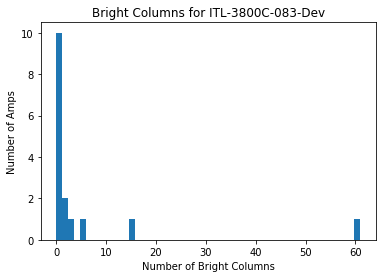

In [9]:
plt.hist(res[ccd_name],bins=50)
plt.title('Bright Columns for ' + ccd_name)
plt.ylabel('Number of Amps')
plt.xlabel('Number of Bright Columns')

### Example: Get All Test Results

For a given run, get all results.

In [32]:
g = get_EO_analysis_results(db='Dev')
raft_list, data = g.get_tests(site_type="I&T-Raft", run ='5943D')

In [33]:
res = g.get_all_results(data=data, device=raft_list)

In [34]:
# Now you have the results of all tests
res.keys()

odict_keys(['gain', 'gain_error', 'psf_sigma', 'cti_low_serial', 'cti_high_serial', 'cti_low_parallel', 'cti_high_parallel', 'cti_low_serial_error', 'cti_high_serial_error', 'cti_low_parallel_error', 'cti_high_parallel_error', 'read_noise', 'system_noise', 'total_noise', 'bright_pixels', 'bright_columns', 'dark_pixels', 'dark_columns', 'num_traps', 'dark_current_95CL', 'ptc_gain', 'ptc_gain_error', 'QE', 'full_well', 'max_frac_dev'])

Text(0.5,1,'Gain Values for ITL-3800C-083-Dev')

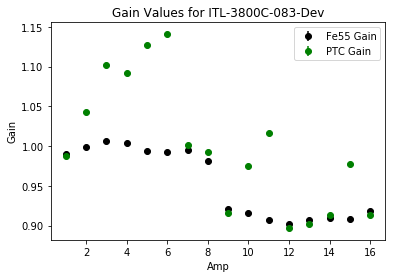

In [35]:
plt.errorbar(range(1,17),res['gain'][ccd_name],yerr=res['gain_error'][ccd_name],color='black',label='Fe55 Gain', fmt='o')
plt.errorbar(range(1,17),res['ptc_gain'][ccd_name],yerr=res['ptc_gain_error'][ccd_name],color='green',label='PTC Gain', fmt='o')
plt.legend(loc='best')
plt.ylabel('Gain')
plt.xlabel('Amp')
plt.title('Gain Values for ' + ccd_name)

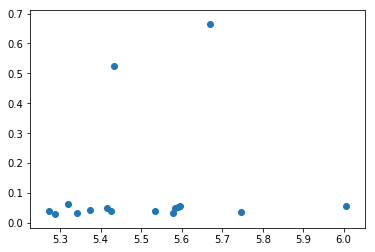

In [36]:
plt.scatter(res['total_noise'][ccd_name],res['dark_current_95CL'][ccd_name])

## Get EO Analysis Files

For a given run and test quantity and image type, get the file paths at SLAC to a specific file.

In [17]:
g = get_EO_analysis_files(db='Prod')
files_list = g.get_files(run='6350', testName='flat_pair_raft_acq', FType="fits",imgtype='BIAS')

In [15]:
files_list['S00'][0]

NameError: name 'files_list' is not defined

## Explore Raft

In [18]:
from  eTraveler.clientAPI.connection import Connection

In [19]:
# Initiate with either prod or dev
eR_prod = exploreRaft(db='Prod')
eR_dev = exploreRaft(db='Dev')

In [20]:
eR_prod.raftContents(run=8831,raftName='LCA-11021_RTM-003_ETU2')

[('ITL-3800C-145', 'S00', 'LCA-13574-007'),
 ('ITL-3800C-022', 'S01', 'LCA-13574-007'),
 ('ITL-3800C-041', 'S02', 'LCA-13574-007'),
 ('ITL-3800C-100', 'S10', 'LCA-13574-009'),
 ('ITL-3800C-017', 'S11', 'LCA-13574-009'),
 ('ITL-3800C-018', 'S12', 'LCA-13574-009'),
 ('ITL-3800C-102', 'S20', 'LCA-13574-010'),
 ('ITL-3800C-146', 'S21', 'LCA-13574-010'),
 ('ITL-3800C-103', 'S22', 'LCA-13574-010')]

## Explore Focal Plane

See what is in the FP at a given time.

In [21]:
#Nothing in the FP a year ago! 
eFP = exploreFocalPlane(db="Prod", prodServer='Prod')
eFP.focalPlaneContents(when='2017-10-11T15:03:54.0')

[]

In [22]:
# Now it returns the two ETU's being tested
eFP = exploreFocalPlane(db="Prod", prodServer='Prod')
eFP.focalPlaneContents(when='2018-10-11T15:03:54.0')

[['LCA-11021_RTM-003_ETU2', 'R10'], ['LCA-11021_RTM-002_ETU1', 'R22']]

## Now Compare to DM Results

In [23]:
fe55_dm = np.load('/home/elp25/bootcamp-work/examples/fe55_gains.npy')

In [28]:
# Get EO analysis results access results from the eTraveler database
g = get_EO_analysis_results(db='Prod')
raft_list, data = g.get_tests(site_type="I&T-Raft", test_type='gain', run ='7086')  # get the data for I&T-Raft
res = g.get_results(test_type='gain', data=data, device=raft_list[0])  

In [29]:
ccd_names = [key for key in res.keys()]
ccd_names[0]

'E2V-CCD250-260'

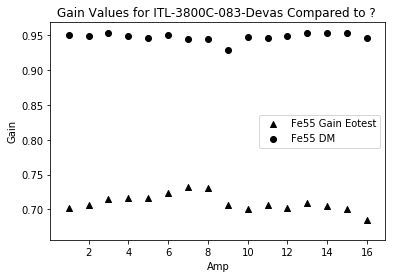

In [30]:
plt.scatter([i for i in range(1,17)],res[ccd_names[0]],color='black',label='Fe55 Gain Eotest',marker='^')
#plt.scatter([i for i in range(1,17)],res_ptc[ccd_name],color='purple',label='PTC Gain Eotest',marker='^')
plt.scatter([i for i in range(1,17)],fe55_dm,color='black', label='Fe55 DM')
plt.ylabel('Gain')
plt.xlabel('Amp')
plt.title('Gain Values for '+ccd_name + 'as Compared to ? ')
plt.legend()